In [1]:
%pip install numba numpy==2.2

Note: you may need to restart the kernel to use updated packages.


In [1]:
import framework as fr
from filters.blur import *
from filters.distributions import *
from filters.noise import *
from algorithms.richardson_lucy import RihardsonLucy
from algorithms.MAP import MAP
from algorithms.HQMotionBlurRestoration.HQMBR import HQMBR
from algorithms.HQMotionBlurRestoration.convolve  import create_line_psf

from algorithms.test_algorithm import TestAlgorithm
from algorithms.test2_algorithm import TestAlgorithm2
from algorithms.test3_algorithm import TestAlgorithm3
from algorithms.VariationalBayesianBID_last import VariationalBayesianBIDAlgorithm

import cv2 as cv
import numpy as np

In [2]:
tmp = fr.frame('images','blured','restored') #создание фреймворка и папок с картинками (images - изначальные, blured - смазанные и зашумленные, restored - обработанные/восстановленные)

# tmp.changescale(True) #задать цветные(true)/серые(false) картинки

tmp.read_all() #загрузить все из папки 'images' в фрейм ворк

# tmp.read_one('image1.jpeg') #загрузить одну картинку из папки с определенным названием
# tmp.read_one('max.jpg') #загрузить одну картинку из папки с определенным названием
# tmp.read_one('train.jpg') #загрузить одну картинку из папки с определенным названием
# tmp.read_one('saturn.jpg')

# tmp.bind('images\picassoBlurImage.png', 'images\picassoBlurImage.png', color=False)

# tmp.bind(<оригинальное>,<смазанное>,color) #добаляет связку оригинального и смазанного изображения (путь указывать целиком)

# tmp.show_original() #выводит все оригинальные картинки через cv.imshow //не очень удобно

In [3]:
fl1 = GaussianNoise(10)    #фильтры для разных шумов и смазов (см. абстрактный класс filter.FILTER_BASE)
fl2 = PoissonNoise(0.1)
fl4 = SaltAndPepperNoise([1,1,100000])
fl8 = DefocusBlur(gaussian_distribution, param=10,kernel_size = 15)
fl9 = MotionBlur(gaussian_distribution, param=100.0,angle=0,kernel_length=51)

In [4]:
predict = cv.getGaussianKernel(15,1)
predict_1 = predict / predict[0,0]
predict_2 = predict_1 @ predict_1.T
predict_3 = predict_2 / sum(predict_2)
# display(predict_3)

# test = np.array([[0.0, 0.0, 0.0],[0.0, 1.0, 0.0], [0.0, 0.0, 0.0]])

predict_4 = np.array([[0,0,0,0,0,0,1],[0,0,0,0,0,1,0],[0,0,0,0,1,0,0],[0,0,0,1,0,0,0],[0,0,1,0,0,0,0],[0,1,0,0,0,0,0],[1,0,0,0,0,0,0]],dtype=np.float16)
predict_5 = predict_4 / np.sum(predict_4)

predict_6 = np.zeros((31,31),dtype=np.float16)
predict_6[:,:] += 1
predict_6[16,:] += 15
predict_7 = predict_6 / sum(predict_6)
# display(predict_7)
predict_8 = create_line_psf(-np.pi/4, 1, (27, 27))

alg_rl = RihardsonLucy({'psf': predict_3,'iter': 5, 'eps': 1e-8, 'm': 200, 'r':1})

In [6]:
# display(predict_8)

In [5]:
operator = np.array([[-0.5, -1.0, -0.5],[-1.0, 6.0, -1.0],[-0.5, -1.0, -0.5]])
alg_map = MAP(max_iter=200,Huber_threshold=0.008,predict_kernel=predict_3,operator=operator,relaxation_factor=0.06,eps = 0.000001)

In [6]:
alg_hqmbr = HQMBR(1,predict_psf= predict_8, MAX_ITER=5)

In [7]:
alg_vbid = VariationalBayesianBIDAlgorithm()

In [8]:
alg_test1 = TestAlgorithm()
alg_test2 = TestAlgorithm2()
alg_test3 = TestAlgorithm3()

computeLocalPrior took 0.9191803932189941s
38971.804930309554
0: 2.798581123352051s
47112.46502964101
1: 5.093381881713867s
34494.32783996948
2: 7.179357051849365s
36967.71638566033
3: 9.238694667816162s
36013.32017794388
4: 11.750280141830444s
computeLocalPrior took 0.9085619449615479s
131837.85463479572
0: 2.131207227706909s
187281.6565273917
1: 4.4450788497924805s
168693.53279108094
2: 6.501702547073364s
202232.53649779354
3: 8.885979652404785s
199071.36558035793
4: 11.239384889602661s
computeLocalPrior took 0.12295341491699219s
22326.337503136234
0: 0.02633070945739746s
28077.31055725508
1: 0.05196404457092285s
17.265065211989743
2: 0.07797026634216309s
2.487709610014569
3: 0.10453534126281738s
3.0160462356966593
4: 0.13145089149475098s
computeLocalPrior took 0.11997675895690918s
90829.682927913
0: 0.02474045753479004s
91375.63994438312
1: 0.04974365234375s
10.654788297296582
2: 0.0744173526763916s
0.9687048993594607
3: 0.09842133522033691s
0.8806408175996083
4: 0.1224222183227539s

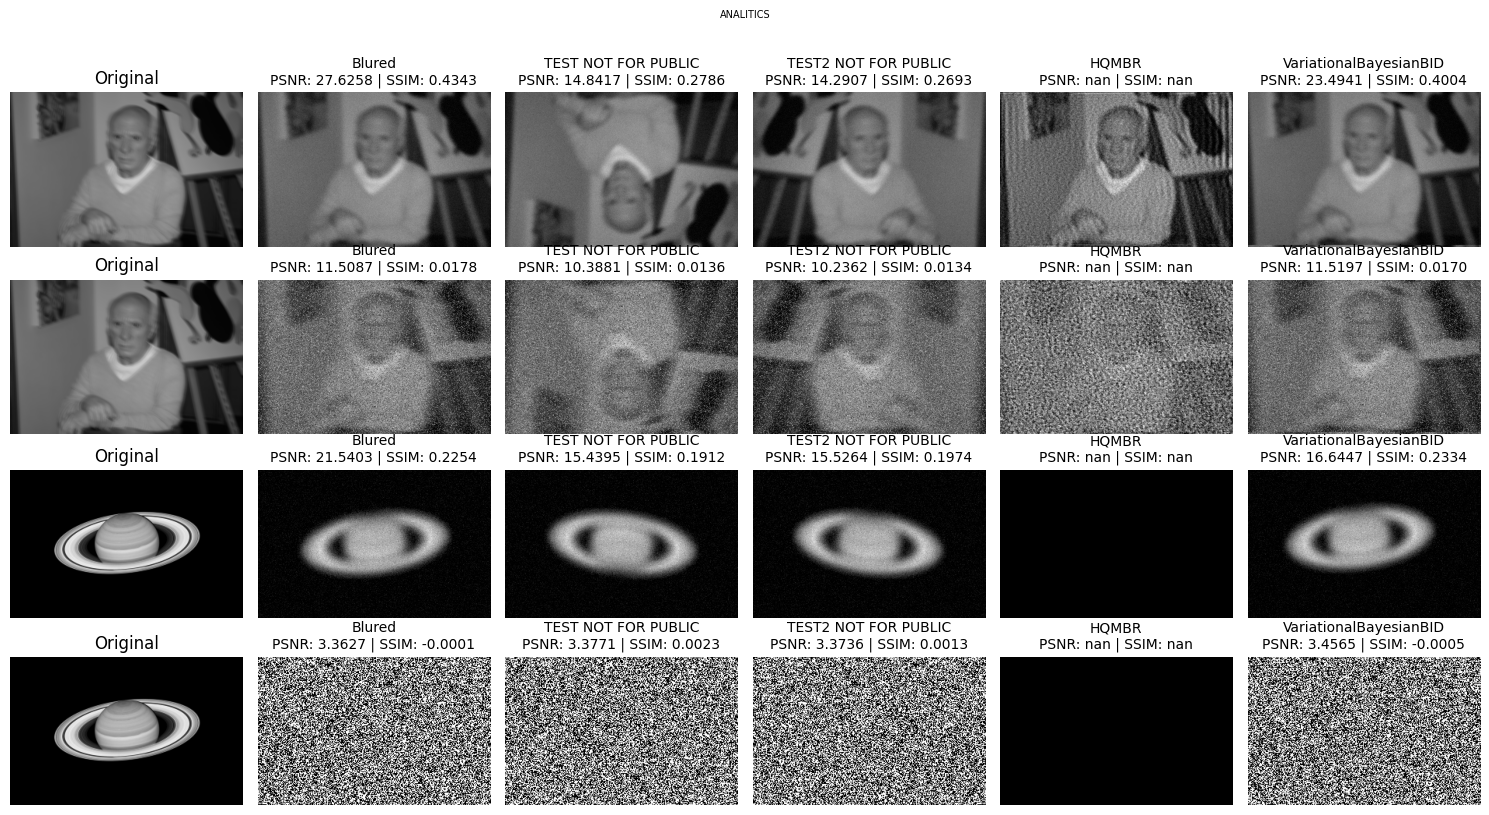

,original,filter,blurred,TEST NOT FOR PUBLIC,TEST2 NOT FOR PUBLIC,HQMBR,VariationalBayesianBID
0,images\saturn.jpg,|defocus_gaussian_distribution_10_15|gaussiann...,blured\saturn_1.jpg,restored\saturn_TEST NOT FOR PUBLIC.jpg,restored\saturn_TEST2 NOT FOR PUBLIC.jpg,restored\saturn_HQMBR.jpg,restored\saturn_VariationalBayesianBID.jpg
1,images\saturn.jpg,|motion_gaussian_distribution_100.0_0_51|salta...,blured\saturn.jpg,restored\saturn_1_TEST NOT FOR PUBLIC.jpg,restored\saturn_1_TEST2 NOT FOR PUBLIC.jpg,restored\saturn_1_HQMBR.jpg,restored\saturn_1_VariationalBayesianBID.jpg
2,images\picassoBlurImage.png,|defocus_gaussian_distribution_10_15|gaussiann...,blured\picassoBlurImage_3.png,restored\picassoBlurImage_2_TEST NOT FOR PUBLI...,restored\picassoBlurImage_2_TEST2 NOT FOR PUBL...,restored\picassoBlurImage_2_HQMBR.png,restored\picassoBlurImage_2_VariationalBayesia...
3,images\picassoBlurImage.png,|motion_gaussian_distribution_100.0_0_51|salta...,blured\picassoBlurImage_2.png,restored\picassoBlurImage_3_TEST NOT FOR PUBLI...,restored\picassoBlurImage_3_TEST2 NOT FOR PUBL...,restored\picassoBlurImage_3_HQMBR.png,restored\picassoBlurImage_3_VariationalBayesia...


,original,filter,blurred,TEST NOT FOR PUBLIC,TEST2 NOT FOR PUBLIC,HQMBR,VariationalBayesianBID
0,images\saturn.jpg,|defocus_gaussian_distribution_10_15|gaussiann...,21.573878,3.377083,3.373612,NaN,3.456496
1,images\saturn.jpg,|motion_gaussian_distribution_100.0_0_51|salta...,3.336268,15.439473,15.526366,NaN,16.644666
2,images\picassoBlurImage.png,|defocus_gaussian_distribution_10_15|gaussiann...,27.625844,10.388147,10.236244,NaN,11.519673
3,images\picassoBlurImage.png,|motion_gaussian_distribution_100.0_0_51|salta...,11.508679,14.841707,14.290702,NaN,23.494107


,original,filter,blurred,TEST NOT FOR PUBLIC,TEST2 NOT FOR PUBLIC,HQMBR,VariationalBayesianBID
0,images\saturn.jpg,|defocus_gaussian_distribution_10_15|gaussiann...,0.249341,0.002294,0.001321,NaN,-0.000498
1,images\saturn.jpg,|motion_gaussian_distribution_100.0_0_51|salta...,-0.000111,0.191164,0.197371,NaN,0.233351
2,images\picassoBlurImage.png,|defocus_gaussian_distribution_10_15|gaussiann...,0.434285,0.013607,0.013411,NaN,0.016979
3,images\picassoBlurImage.png,|motion_gaussian_distribution_100.0_0_51|salta...,0.017750,0.278603,0.269258,NaN,0.400409


In [10]:
# tmp.full_process([fl8],[alg_hqmbr])
# tmp.full_process([fl8],[alg_map, alg_hqmbr, alg_rl])
# tmp.full_process([fl8],[alg_hqmbr])

# tmp.full_process([],[alg_map])
# tmp.process(alg_hqmbr)


tmp.full_process([[fl9,fl4],[fl8,fl1]],[alg_test1,alg_test2,alg_hqmbr,alg_vbid],size=0.5)
# tmp.show(size = 0.75)

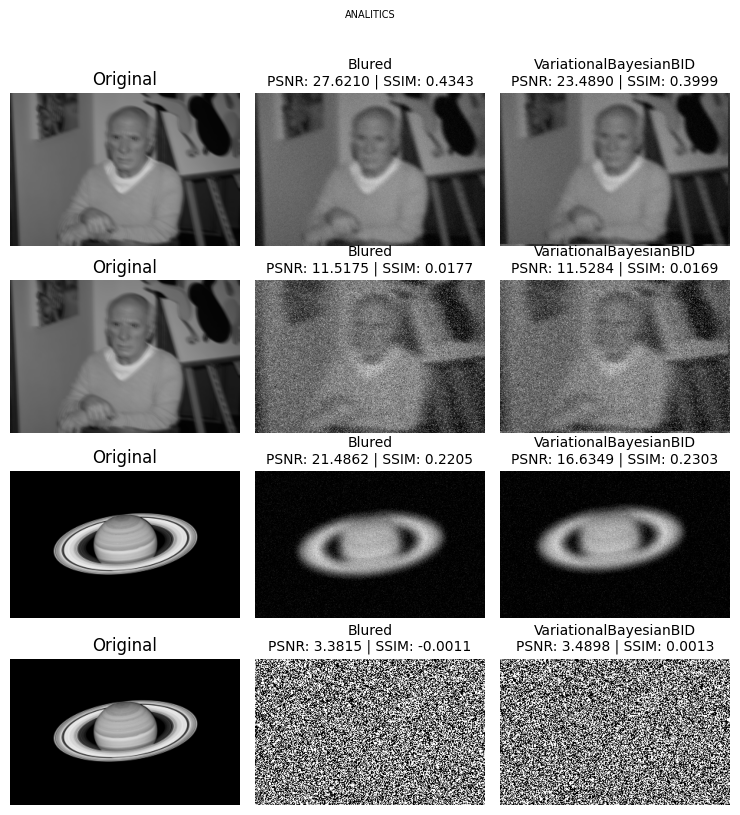

,original,filter,blurred,VariationalBayesianBID
0,images\saturn.jpg,|defocus_gaussian_distribution_10_15|gaussiann...,blured\saturn_3.jpg,restored\saturn_2_VariationalBayesianBID.jpg
1,images\saturn.jpg,|motion_gaussian_distribution_100.0_0_51|salta...,blured\saturn_2.jpg,restored\saturn_3_VariationalBayesianBID.jpg
2,images\picassoBlurImage.png,|defocus_gaussian_distribution_10_15|gaussiann...,blured\picassoBlurImage_5.png,restored\picassoBlurImage_4_VariationalBayesia...
3,images\picassoBlurImage.png,|motion_gaussian_distribution_100.0_0_51|salta...,blured\picassoBlurImage_4.png,restored\picassoBlurImage_5_VariationalBayesia...


,original,filter,blurred,VariationalBayesianBID
0,images\saturn.jpg,|defocus_gaussian_distribution_10_15|gaussiann...,21.520124,3.489840
1,images\saturn.jpg,|motion_gaussian_distribution_100.0_0_51|salta...,3.354920,16.634870
2,images\picassoBlurImage.png,|defocus_gaussian_distribution_10_15|gaussiann...,27.621021,11.528430
3,images\picassoBlurImage.png,|motion_gaussian_distribution_100.0_0_51|salta...,11.517493,23.489001


,original,filter,blurred,VariationalBayesianBID
0,images\saturn.jpg,|defocus_gaussian_distribution_10_15|gaussiann...,0.243614,0.001348
1,images\saturn.jpg,|motion_gaussian_distribution_100.0_0_51|salta...,-0.001101,0.230315
2,images\picassoBlurImage.png,|defocus_gaussian_distribution_10_15|gaussiann...,0.434254,0.016864
3,images\picassoBlurImage.png,|motion_gaussian_distribution_100.0_0_51|salta...,0.017697,0.399886


In [9]:
tmp.full_process([[fl9,fl4],[fl8,fl1]],[alg_vbid],size=0.5)

In [ ]:
# tmp.full_process([fl8,fl5,fl4],[alg1,alg2],1.0) #пайплайн из наложения смазов и восстановления заданными методами, нахождение лучшего и худшего и их вывод

In [ ]:
# tmp.filter(fl1)
# tmp.filter(fl2)

# tmp.show()
# tmp.process(alg_test1)
# tmp.process(alg_test2)
# tmp.show()

# tmp.save_filter()
# tmp.filter(fl4)
# tmp.filter(fl8)
# tmp.filter(fl9)
# tmp.show()
# tmp.process(alg_test3)
# tmp.show()

# tmp.save_filter()
# tmp.load_filter(0)
# tmp.show()

# tmp.process(alg_rl)

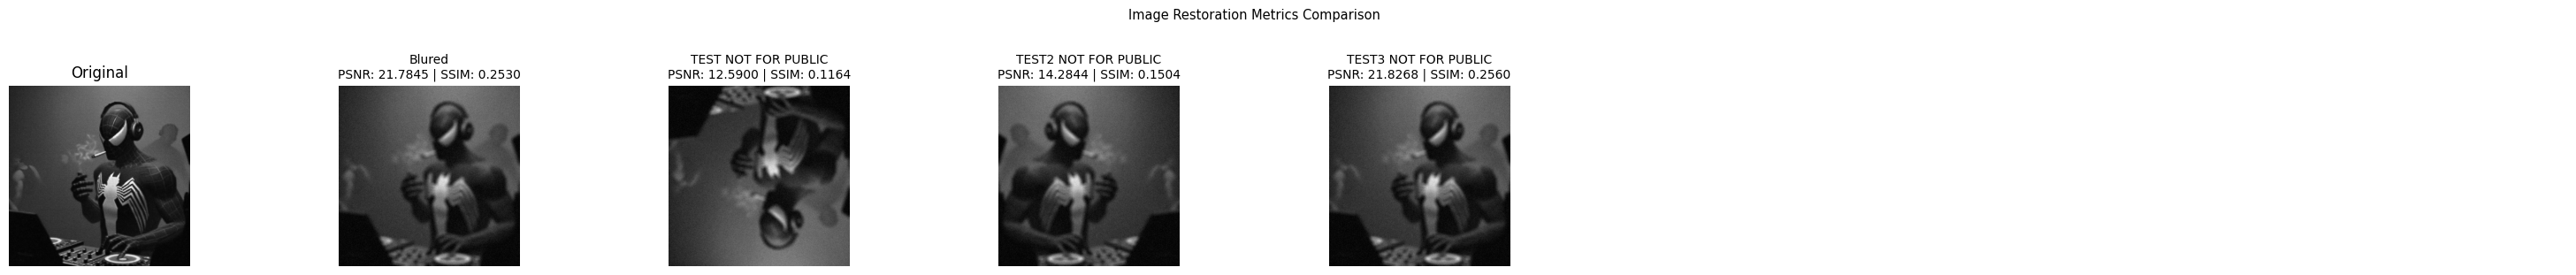

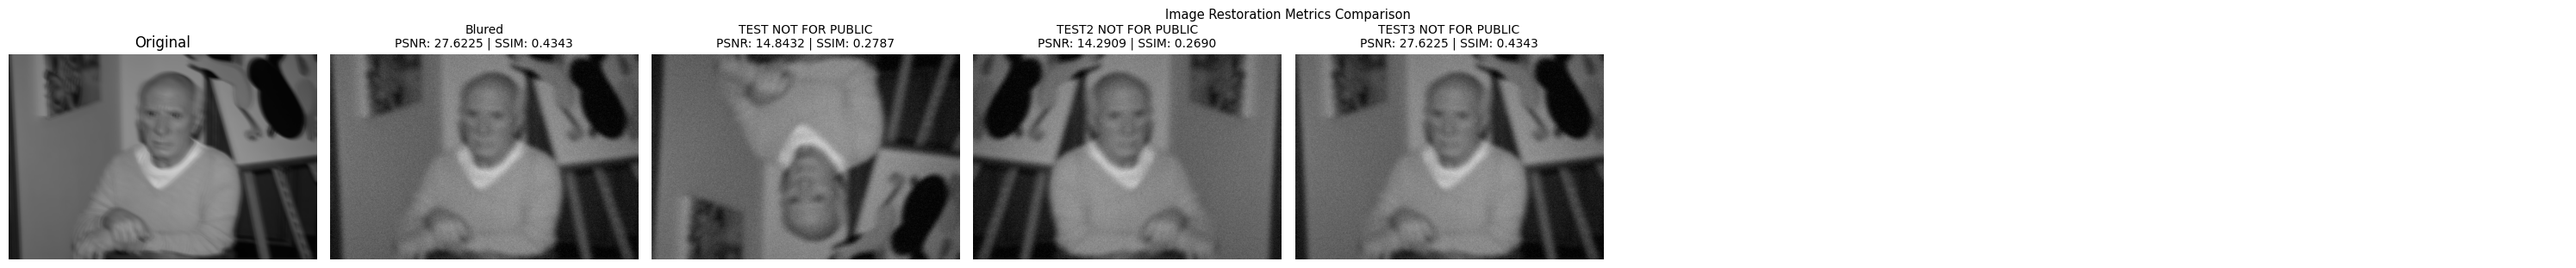

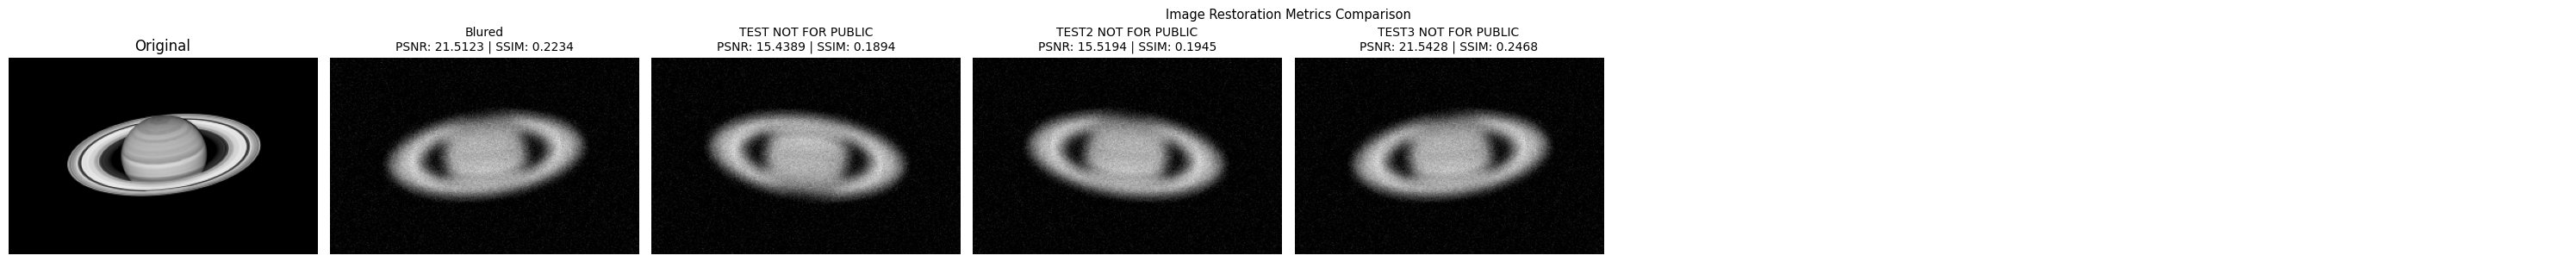

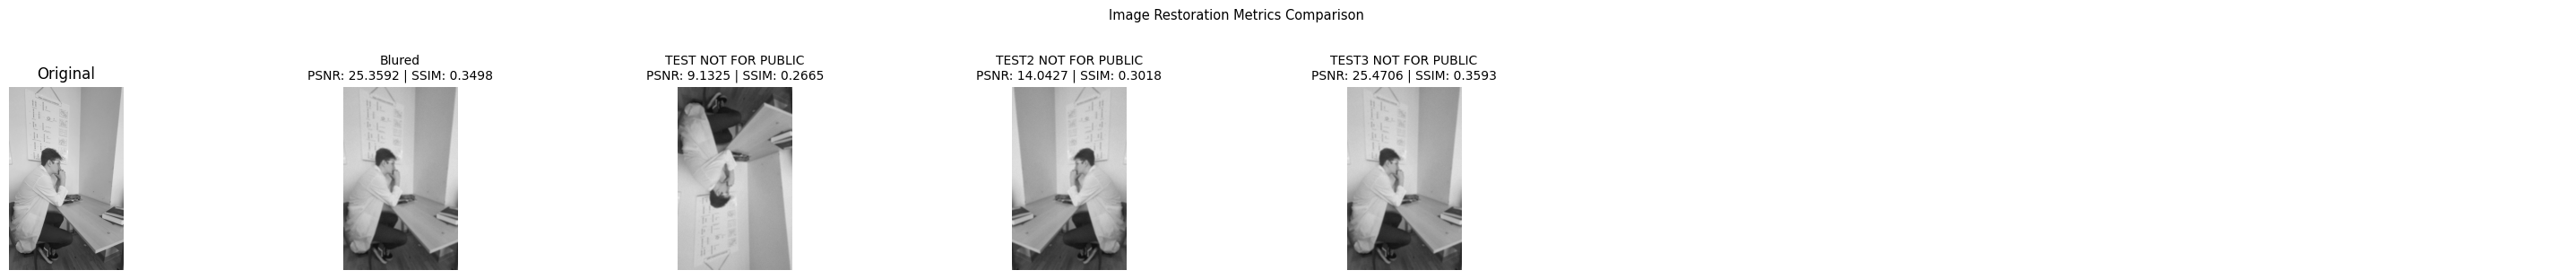

In [ ]:
# tmp.show_blured() #выводит все смазанные картинки через cv.imshow //не очень удобно
# tmp.show_restored() #выводит все восстановленные картинки через cv.imshow //не очень удобно
tmp.show(size = 0.75) #выводит картинки следующим образом: оригинал | смазанное + метрики | востановленное + метрики ...

In [ ]:
# a = [ i[0] for i in tmp.get_metrics()] # получить метрики в массиве (если надо будет)

# print([i for i in enumerate(a)])

# print(max( [max(i) for i in a ]))

In [ ]:
tmp.clear_output() #удаляет все привязанные отфильрованные и восстановленные картинки
tmp.reset() #в теории убирает привязку к отфильтрованным и восстановленным картинкам
tmp.clear_input() #убирает привязку ко всем загруженным картинкам (загружать надо заново)


In [10]:
tmp.clear_output_directory() # УДАЛЯЕТ ВООБЩЕ ВСЕ из директорий с отфильрованными и восстановленными картинками + reset()